

# Project: Investigate a Dataset (No-show appointments!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> this is No-show appointments.
dataset it is contain a part of Brazilian welfare program Bolsa Família this data set interesting in data of patient information whose attend the Scheduled Day
we will investigate in the factors who increase the attendance Scheduled Day numbers


In [110]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [111]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

<a id='wrangling'></a>
## Data Wrangling

<a id='wrangling'></a>
## get Knowledge about data set

In [112]:
df.shape

(110527, 14)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='wrangling'></a>
## There is 14 columns and 110527 rows
## There is no missing  values
## Is there any duplicated data?

In [114]:
df.duplicated().sum()

0

<a id='wrangling'></a>

## replacing the column name to lowercase and to be one word

In [115]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

<a id='wrangling'></a>

## Change the scheduled day & appointment date to datetime instead of object

In [116]:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [117]:
print(df['no-show'].unique())
print(df['no-show'].nunique())

['No' 'Yes']
2


<a id='wrangling'></a>

## Change no-show to be one word

In [118]:
df.rename(columns={'no-show':'noshow'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
noshow            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [119]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='wrangling'></a>

## Delete row contain unlogic age

In [120]:
min_age=df.age.min()
min_age
min_age=df[df.age == min_age]
# min_age
idm = df.age.idxmin()
print(idm)
df = df[df.age != -1]
df.shape[0]

99832


110526

In [121]:
df.age.count()

110526

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Replace this header name!)
## Is age SMS received alcoholism and scholarship affect the appointment attendance

No     88207
Yes    22319
Name: noshow, dtype: int64


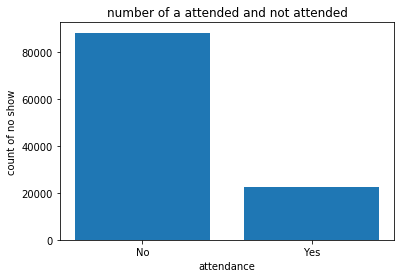

In [122]:
noshow_data=df.noshow.value_counts()
plt.bar(noshow_data.index,noshow_data.values)
plt.title('number of a attended and not attended')
plt.xlabel('attendance')
plt.ylabel('count of no show')
print(noshow_data)

<a id='eda'></a>
## Count Of Attendance Comparison 


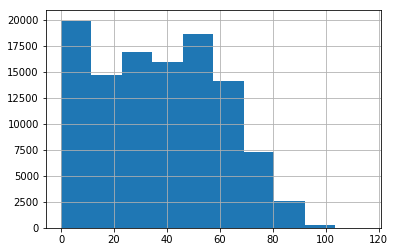

In [123]:
df.age.describe()
# age_5_no = [0 ,18 ,37 ,55 ,115]
df.age.hist()

<a id='eda'></a>
## determine the count of ages per stage and stage 15 year


<a id='eda'></a>
## Count Of Attendance Comparison 


In [124]:
averages = [x for x in range(0,130,15)]
averages

[0, 15, 30, 45, 60, 75, 90, 105, 120]

In [125]:
def age_analyze(noshow,title):
    df_age = pd.DataFrame(columns=['upper_edges' , 'count_age_noshow'])
    for i in range(0,len(averages)-1,1):
        no_show=df.query("(age>="+str(averages[i])+") and (age<"+str(averages[i+1])+") and (noshow=='"+noshow+"')").noshow.count()
        df_age.loc[i] = [averages[i+1], no_show]
    
    print(df_age)
    df_age['upper_edges']=df_age['upper_edges'].astype(int)
    df_age['count_age_noshow']=df_age['count_age_noshow'].astype(int)
    
    df_age.plot(x='upper_edges', y='count_age_noshow', kind='scatter',title=title)

    plt.xlabel('ages from 0 to 120')
    plt.ylabel('count of ages')
    df_age.plot(x='upper_edges', y='count_age_noshow', kind='bar', title=title)
    plt.xlabel('ages from 0 to 120')
    plt.ylabel('count of ages')
    
   


  upper_edges count_age_noshow
0          15             4926
1          30             5195
2          45             4806
3          60             4150
4          75             2291
5          90              866
6         105               82
7         120                3


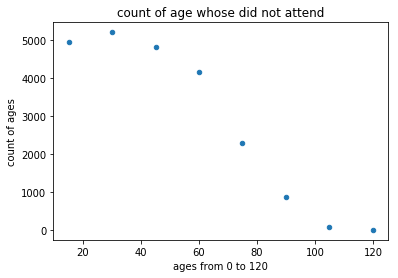

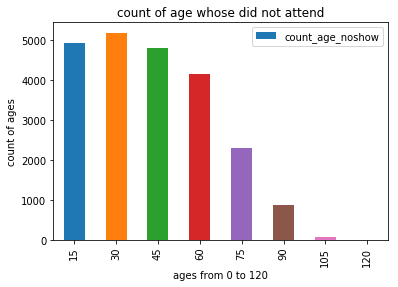

In [126]:
age_analyze('Yes','count of age whose did not attend')

<a id='eda'></a>
## Count Of Attended people Comparison Per Age

  upper_edges count_age_noshow
0          15            18331
1          30            15658
2          45            17216
3          60            19071
4          75            12946
5          90             4653
6         105              330
7         120                2


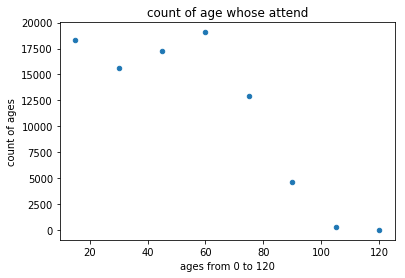

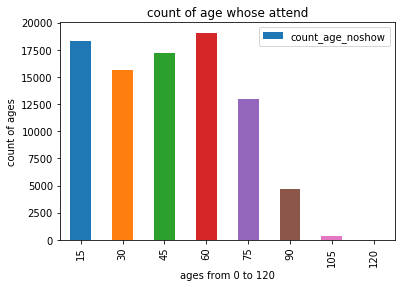

In [127]:
age_analyze('No','count of age whose attend')

<a id='eda'></a>
## Count Of Not Attended people Comparison Per Age

In [128]:
def analyze_independent(column):
    print(df[column].unique())
    print(df[column].value_counts().values)
    
    count_series=df.groupby([column,'noshow']).size()
    new_df = count_series.to_frame(name = 'size').reset_index()
    print(new_df)
    return new_df


def drow_percentage_bar(new_df,column):
    column=column.replace('_',' ')
    notindependent=new_df['size'][1]/new_df['size'][0]
    independent=new_df['size'][3]/new_df['size'][2]
    print('not '+column,notindependent)
    print(column,independent)
    plt.bar(['percentage not '+column, 'percentage '+column],[notindependent,independent])
    plt.title('percentage between whose attend the appointment and not attended')
    plt.xlabel(column+' comparison')
    plt.ylabel('efficiency of attendance') 
    
    
def drow_pie(new_df,column):
    column=column.replace('_',' ')
    y = np.array([new_df['size'][0]/df.shape[0],
             new_df['size'][1]/df.shape[0],
             new_df['size'][2]/df.shape[0],
             new_df['size'][3]/df.shape[0]])
    mylabels = ["not "+column+" and attend ", "not "+column+" and not attend",
            column+'and attend',column+' and not attend']
    plt.pie(y, labels = mylabels,autopct='%1.1f%%')
    plt.title('percentage of attendance and effective of '+column)
    plt.show()
    
    

def drow_bar(new_df,column):
    column=column.replace('_',' ')
    plt.title('count comparison between whose attend and not attended including '+column+' effective')
    plt.xlabel(column+' comparison')
    plt.ylabel('efficiency of attendance') 
    column=column.replace(' ','_')
    plt.bar(new_df.query(column+"== 0 ")['noshow'], new_df.query(column+"== 0 ")['size'], tick_label=['No','Yes'])
    plt.bar(new_df.query(column+"== 1 ")['noshow'], new_df.query(column+"== 1 ")['size'], tick_label=['No','Yes'])
    

    

[0 1]
[75044 35482]
   sms_received noshow   size
0             0     No  62509
1             0    Yes  12535
2             1     No  25698
3             1    Yes   9784
not sms received 0.200531123518
sms received 0.3807300179


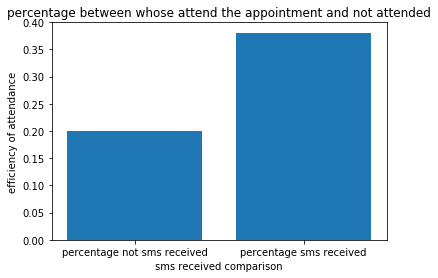

In [129]:
new_df=analyze_independent('sms_received')
drow_percentage_bar(new_df,'sms_received')

<a id='eda'></a>
## Because the difference of Number pepole who received SMS the previous chart represent the percentage the not attended to attended and received SMS and percentage the not attended to attended and not received SMS  

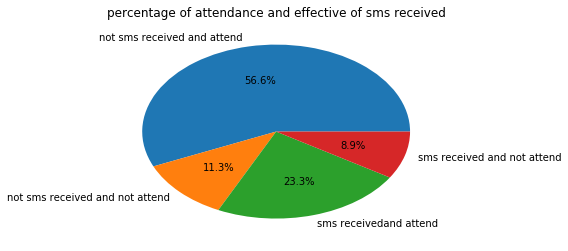

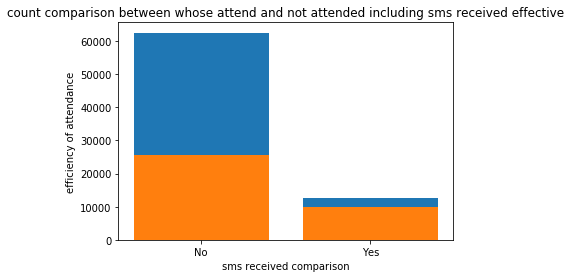

In [130]:
drow_pie(new_df,'sms_received')
drow_bar(new_df,'sms_received')

<a id='eda'></a>
## Number of received sms and not received sms attended and not attende 

[0 1]
[107166   3360]
   alcoholism noshow   size
0           0     No  85524
1           0    Yes  21642
2           1     No   2683
3           1    Yes    677
not alcoholism 0.25305177494
alcoholism 0.252329481923


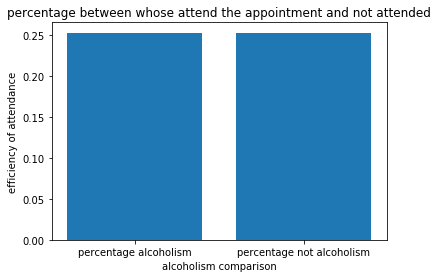

In [131]:
new_df=analyze_independent('alcoholism')
drow_percentage_bar(new_df,'alcoholism')

<a id='eda'></a>
## Because the difference of Number alcoholisms pepole the previous chart represent the percentage the not attended to attended and alcoholisms and percentage the not attended to attended and not alcoholisms 

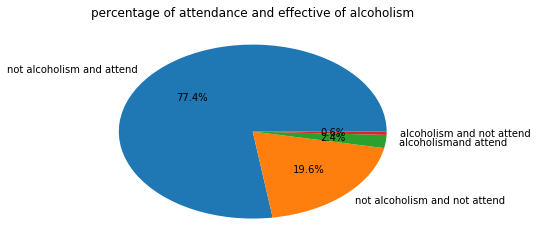

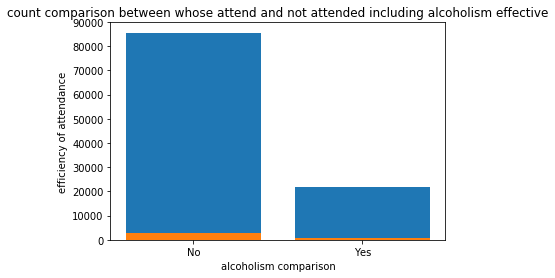

In [132]:
drow_pie(new_df,'alcoholism')
drow_bar(new_df,'alcoholism')

<a id='eda'></a>
## Number of alcoholism and not alcoholism attended and not attende 

[0 1]
[99665 10861]
   scholarship noshow   size
0            0     No  79924
1            0    Yes  19741
2            1     No   8283
3            1    Yes   2578
not scholarship 0.24699714729
scholarship 0.311239888929


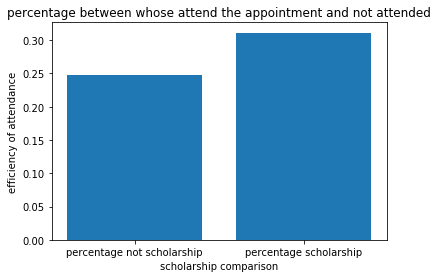

In [133]:
new_df=analyze_independent('scholarship')
drow_percentage_bar(new_df,'scholarship')

<a id='eda'></a>
## Because the difference of Number scholarship pepole the previous chart represent the percentage the not attended to attended and have scholarship and percentage the not attended to attended and not have scholarship 

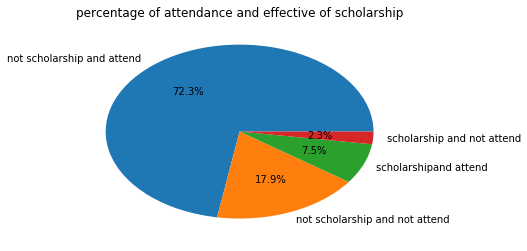

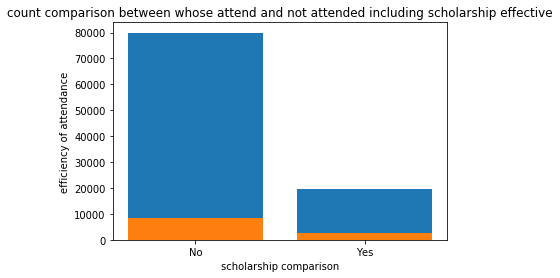

In [134]:
drow_pie(new_df,'scholarship')
drow_bar(new_df,'scholarship')

<a id='eda'></a>
## Number of scholarship and not scholarship attended and not attende 

<a id='conclusions'></a>
## Conclusions

data set contains 14 columns and 110527 row there is no duplicate rows and there is no missing values
there is one row deleted because it is contain age -1 
the quesion is :- What factors are important for us to know in order to predict if a patient will
show up for their scheduled appointment?
the investigation for one dependant variable (no-show) and 4 independant variable
1-age
2-sms received
3-alcoholism
4-scholarship

age :- age was divided for 8 stages ,15 year per stage from 0 youngest age to 115 oldest age 
the most life stage of patients whose did not show up for their scheduled appointment respectively:-  (30,15,45,60,75,90,105,115)
and the most life stage of patients whose not show up for their scheduled appointment respectively:- (60,15,45,30,75,90,105,115)

alcoholism:-did not show any signeficant difference for attend the scheduled appointment the percent
was the same in 2 cases 25%

sms received:- there is an elevation of patients who received SMS and attended the scheduled appointment by 0.180198894382

scholarship:- there is an elevation of people who have scholarship and attended the scheduled appointment by 0.064242741639



In [135]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0